In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Using TensorFlow backend.


In [2]:
with open('data_batch_1', 'rb') as f:
    batch_1 = pickle.load(f, encoding='bytes')

In [3]:
images = np.zeros((10000, 32, 32, 3), dtype='uint8')

for idx, img in enumerate(batch_1[b'data']):
    images[idx, :, :, 0] = img[:1024].reshape((32, 32)) # Red
    images[idx, :, :, 1] = img[1024:2048].reshape((32, 32)) # Green
    images[idx, :, :, 2] = img[2048:].reshape((32, 32)) # Blue

In [4]:
images = images.mean(axis=-1)
images = images / 255.0
images = images.reshape((-1, 32 ** 2))
images

array([[0.24052288, 0.1751634 , 0.18431373, ..., 0.70588235, 0.46143791,
        0.3751634 ],
       [0.67712418, 0.52156863, 0.39738562, ..., 0.54248366, 0.54771242,
        0.54901961],
       [1.        , 0.99215686, 0.99215686, ..., 0.32156863, 0.32287582,
        0.32679739],
       ...,
       [0.25098039, 0.21437908, 0.27843137, ..., 0.28888889, 0.29673203,
        0.29934641],
       [0.99346405, 0.99477124, 0.85620915, ..., 0.8379085 , 1.        ,
        0.99738562],
       [0.1620915 , 0.16078431, 0.15816993, ..., 0.64705882, 0.64705882,
        0.64836601]])

In [6]:
input_layer = Input(shape=(1024,))

In [8]:
encoding_stage = Dense(256, activation='relu')(input_layer)

In [9]:
decoding_stage = Dense(1024, activation='sigmoid')(encoding_stage)

In [10]:
autoencoder = Model(input_layer, decoding_stage)

In [13]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [14]:
autoencoder.fit(images, images, epochs=100)

Epoch 1/100
10000/10000 [==============================] - 19s 2ms/step - loss: 0.6800
Epoch 2/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.6602
Epoch 3/100
10000/10000 [==============================] - ETA: 0s - loss: 0.650 - 18s 2ms/step - loss: 0.6502
Epoch 4/100
10000/10000 [==============================] - 20s 2ms/step - loss: 0.6438
Epoch 5/100
10000/10000 [==============================] - 21s 2ms/step - loss: 0.6377
Epoch 6/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6324
Epoch 7/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.6280: 0s - loss: 0.6
Epoch 8/100
10000/10000 [==============================] - 19s 2ms/step - loss: 0.6240
Epoch 9/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.6201
Epoch 10/100
10000/10000 [==============================] - 16s 2ms/step - loss: 0.6161
Epoch 11/100
10000/10000 [==============================] - 16s 2ms/step - loss: 0.6123
E

10000/10000 [==============================] - 9s 908us/step - loss: 0.5785
Epoch 91/100
10000/10000 [==============================] - 9s 899us/step - loss: 0.5784
Epoch 92/100
10000/10000 [==============================] - 9s 883us/step - loss: 0.5783
Epoch 93/100
10000/10000 [==============================] - 9s 909us/step - loss: 0.5782
Epoch 94/100
10000/10000 [==============================] - 9s 874us/step - loss: 0.5783
Epoch 95/100
10000/10000 [==============================] - 9s 908us/step - loss: 0.5781
Epoch 96/100
10000/10000 [==============================] - 9s 873us/step - loss: 0.5780
Epoch 97/100
10000/10000 [==============================] - 9s 916us/step - loss: 0.5780
Epoch 98/100
10000/10000 [==============================] - 9s 890us/step - loss: 0.5778
Epoch 99/100
10000/10000 [==============================] - 9s 892us/step - loss: 0.5777 0s - loss: 0
Epoch 100/100
10000/10000 [==============================] - 9s 904us/step - loss: 0.5778


In [15]:
encoder_output = Model(input_layer, encoding_stage).predict(images[:5])

In [16]:
encoder_output = encoder_output.reshape((-1, 16, 16)) * 255

In [17]:
decoder_output = autoencoder.predict(images[:5])

In [18]:
decoder_output = decoder_output.reshape((-1, 32,32)) * 255

In [19]:
images = images.reshape((-1, 32, 32))

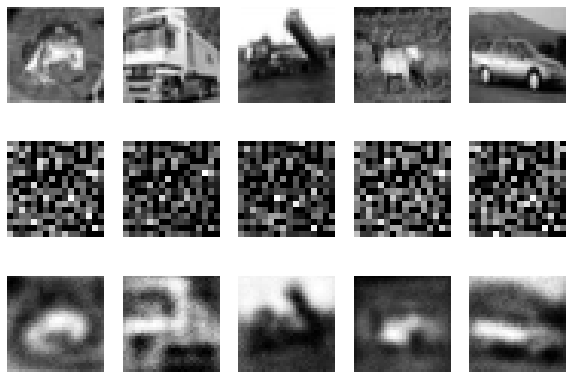

In [20]:
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
    # Plot the encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(encoder_output[i], cmap='gray')
    plt.axis('off')   
    
    # Plot the decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(decoder_output[i], cmap='gray')
    plt.axis('off')        